### MAE_6967_Respiratorio e Digestivo_20set2020_Denise_A23set

1) Análise inicial do arquivo SIH

2) Correlação com doenças digestivo -- separação de dados específicos

3) Juntar depois com arquivos do entorno e afins para montar correlação.

# Bibliotecas

In [65]:
import plotly_express as px
# biblioteca nova, para visualização com diferentes formas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [66]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# Leitura do Arquivo dados_SIH_AIH_SP_2017

In [67]:
df=pd.read_csv('b_17.csv',encoding = "ISO-8859-1", low_memory=False, nrows=1000000)
# somente 10 mil linhas, para não carregar muito

In [68]:
df.head()

gid   uf_zi  ano_cmpt  mes_cmpt  espec  cgc_hosp          n_aih  ident  \
0    1  350000      2017         1      3       NaN  3517107468424      1   
1    2  350000      2017         1      3       NaN  3517107468457      1   
2    3  350000      2017         1      3       NaN  3517107468512      1   
3    4  350000      2017         1      3       NaN  3517107468600      1   
4    5  350000      2017         1      3       NaN  3517107468622      1   

       cep  munic_res      nasc  sexo  uti_mes_in  uti_mes_an  uti_mes_al  \
0  8665480     355250  19800326     1           0           0           0   
1  3577030     355030  19800908     1           0           0           0   
2  1446010     355030  19580308     1           0           0           0   
3  5159180     355030  20050108     3           0           0           0   
4  8830290     353060  19581011     3           0           0           0   

   uti_mes_to  marca_uti  uti_int_in  uti_int_an  uti_int_al  uti_int_to  \
0           0          0           0           0           0           0   
1           0          0           0           0           0           0   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4           0          0           0           0           0           0   

   diar_acom  qt_diarias  proc_solic   proc_rea  val_sh  val_sp  val_sadt  \
0          0           1   303040289  303040289  240.63   63.17         0   
1          0           1   305020021  305020021  426.46   26.77         0   
2          0           1   303060026  303060026  281.34   84.43         0   
3          2           2   304100013  304100013  252.79   16.30         0   
4          0           1   301060088  301060088   33.34   10.88         0   

   val_rn  val_acomp  val_ortp  val_sangue  val_sadtsr  val_transp  \
0       0          0         0           0           0           0   
1       0          0         0           0           0           0   
2       0          0         0           0           0           0   
3       0          0         0           0           0           0   
4       0          0         0           0           0           0   

   val_obsang  val_ped1ac  val_tot  val_uti  us_tot  dt_inter  dt_saida  \
0           0           0   303.80      0.0   98.31  20170109  20170109   
1           0           0   453.23      0.0  146.67  20170102  20170103   
2           0           0   365.77      0.0  118.37  20170103  20170104   
3           0           0   269.09      0.0   87.08  20170102  20170104   
4           0           0    44.22      0.0   14.31  20170111  20170111   

  diag_princ  diag_secun  cobranca  natureza  nat_jur  gestao  rubrica  \
0        G35           0        12         0     1112       2        0   
1       N200           0        15         0     1112       2        0   
2        I48           0        15         0     1112       2        0   
3       C400           0        12         0     1112       2        0   
4       M751           0        15         0     1112       2        0   

   ind_vdrl  munic_mov  cod_idade  idade  dias_perm  morte  nacional  \
0         0     355030          4     36          0      0        10   
1         0     355030          4     36          1      0        10   
2         0     355030          4     58          1      0        10   
3         0     355030          4     11          2      0        10   
4         0     355030          4     58          0      0        10   

   num_proc  car_int  tot_pt_sp  cpf_aut  homonimo  num_filhos  instru  \
0       NaN        1          0      NaN         0           0       0   
1       NaN        1          0      NaN         0           0       0   
2       NaN        2          0      NaN         0           0       0   
3       NaN        2          0      NaN         0           0       0   
4       NaN        1          0      

In [69]:
df.info()
# nr total de linhas correto, com um index e gid (na esquerda), que não devem ser usados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 117 entries, gid to mes
dtypes: float64(16), int64(88), object(13)
memory usage: 892.6+ MB


In [70]:
df.isnull().sum() 
# não temos nulos, ok.

gid         0
uf_zi       0
ano_cmpt    0
mes_cmpt    0
espec       0
           ..
tpdisec8    0
tpdisec9    0
uf          0
ano         0
mes         0
Length: 117, dtype: int64

# Preparação de dados específicos

In [71]:
df1=pd.DataFrame(df,columns=['munic_res', 'diag_princ'])
print(df1.shape)
df1.sample(3)

(1000000, 2)


munic_res diag_princ
537945     353430       O342
483799     353950       F410
312843     352270       O021

In [72]:
# Doenças do aparelho respiratório J00-J99,
# Doenças do aparelho digestivo    K00-K93
# Separação das doenças do sistema digestivo especificamente -- grupo CID10 = K20 -K93

In [73]:
dados = df1.loc[:, ['munic_res','diag_princ']]
# subconjunto_chave primária_doença
dados['subgrupo'] = dados['diag_princ'].astype(str).str.slice(0,1)
#focar na letra_inicial, criando uma coluna específica subgrupo, só com a letra K ou J
temp = np.where(dados['subgrupo'].isin(['K', 'J']))
#específico para K e J
dados = dados.loc[temp]
# reunir tudo
dados.sample(3)

munic_res diag_princ subgrupo
938771     352190       J459        J
822940     350600       K921        K
21467      351300       J938        J

In [74]:
dados.shape
# conjunto pequeno, cerca de 10% do arquivo inicial

(189942, 3)

In [75]:
dados.info()
# munic_res como "int64"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189942 entries, 19 to 999994
Data columns (total 3 columns):
munic_res     189942 non-null int64
diag_princ    189942 non-null object
subgrupo      189942 non-null object
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [76]:
# transformando K em numérico
dadosK = df1.loc[:, ['munic_res','diag_princ']]
dadosK['subgrupo'] = dadosK['diag_princ'].astype(str).str.slice(0,1)
#dadosK['Cod_setor'] = dadosK['Cod_setor'].astype(str)
temp = np.where(dadosK['subgrupo'].isin(['K']))
dadosK = dadosK.loc[temp]
dadosK.sample(3)

munic_res diag_princ subgrupo
400371     351060       K754        K
225198     352720       K602        K
742725     353130       K297        K

In [77]:
dadosk = dadosK.dropna()

In [78]:
# isolar apenas os J
dadosJ = df1.loc[:, ['munic_res','diag_princ']]
dadosJ['subgrupo'] = dadosJ['diag_princ'].astype(str).str.slice(0,1)
temp = np.where(dadosJ['subgrupo'].isin(['J']))
dadosJ = dadosJ.loc[temp]
dadosJ.sample(3)

munic_res diag_princ subgrupo
128548     352670       J189        J
499082     350635       J180        J
831436     355030       J440        J

In [79]:
dadosJ = dadosJ.dropna()

In [80]:
dadosK.shape

(98999, 3)

In [81]:
dadosJ.shape

(90943, 3)

In [82]:
1120 + 656
# partição correta com relação às doenças J & K

1776

# Junção dos dataframes das doenças K e J -- uso de função "concat"

In [83]:
d=[dadosJ,dadosK]
d1=pd.concat(d)
d1.info

<bound method DataFrame.info of         munic_res diag_princ subgrupo
21         351060       J189        J
32         352500       J158        J
35         352210       J849        J
36         355030       J158        J
47         355030        J81        J
...           ...        ...      ...
999960     355030       K828        K
999970     355030       K610        K
999971     355030       K804        K
999980     355030       K808        K
999993     353440       K929        K

[189942 rows x 3 columns]>

In [84]:
d1 = d1.dropna()

In [85]:
d1['munic_res'] = d1['munic_res'].astype(str)

In [86]:
d1.info(verbose=True)
# munic_res é now = "object"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189942 entries, 21 to 999993
Data columns (total 3 columns):
munic_res     189942 non-null object
diag_princ    189942 non-null object
subgrupo      189942 non-null object
dtypes: object(3)
memory usage: 5.8+ MB


In [87]:
d1.sample(10)

munic_res diag_princ subgrupo
816528    355030       J159        J
587958    355030       J180        J
144337    353870       K650        K
429844    355030       K650        K
574959    355030       J342        J
433173    355030       K805        K
825168    351570       K819        K
723323    351880       J189        J
371553    355030       K402        K
81076     354230       K210        K

### Acoplamento com arquivo entorno SP02 (cidades diferentes da Capital)
### entorno_02 = 47733 , 203 registros,
### chave primária deverá ser "Cod_setor", derivada do "munic_res"

In [88]:
pd.set_option('display.max_columns', None)  

In [89]:
a=pd.read_csv(r'e01_SP2.csv', sep=";",decimal='.',encoding = 'latin', low_memory=False, error_bad_lines=False, index_col=False, nrows=8000)

In [90]:
a['Cod_setor'] = a['Cod_setor'].astype(str).str.slice(0,6)
a.rename(columns={'Cod_setor':'munic_res'}, inplace=True)
print(a.shape)
a.sample(3)

(8000, 203)


munic_res  Situacao_setor  V001  V002  V003  V004  V005  V006  V007  \
2119    350341               1    48     1    36     1     7     1     2   
3366    350550               1   373   261     0    83     0    29     0   
930     350210               8     8     0     0     0     0     0     0   

      V008  V009  V010  V011  V012  V013  V014  V015  V016  V017  V018  V019  \
2119    37     0     8     0     3     0    37     0     8     0     3     0   
3366   261     0    83     0    29     0   261     0    83     0    29     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V020  V021  V022  V023  V024  V025  V026  V027  V028  V029  V030  V031  \
2119    30     7     5     3     2     1    37     0     8     0     3     0   
3366   261     0    83     0    29     0   261     0    83     0    29     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V032  V033  V034  V035  V036  V037  V038  V039  V040  V041  V042  V043  \
2119     0    37     0     8     0     3     0    37     0     8     0     3   
3366    44   217    15    68    10    19     0   261     0    83     0    29   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V044  V045  V046  V047  V048  V049  V050  V051  V052  V053  V054  V055  \
2119    37     0     8     0     3     0     0    37     0     8     0     3   
3366   261     0    83     0    29     0     0   261     0    83     0    29   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V056  V057  V058  V059  V060  V061  V062  V063  V064  V065  V066  V067  \
2119     0    37     0     8     0     3     3    45     0     0    48     0   
3366     0   261     0    83     0    29   368     0     3     0   368     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V068  V069  V070  V071  V072  V073  V074  V075  V076  V077  V078  V079  \
2119     0     0    48     0     0     0    37    11     0     0    48     0   
3366     3     0   368     0     3     0   368     0     3     0   368     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V080  V081  V082  V083  V084  V085  V086  V087  V088  V089  V090  V091  \
2119     0     0     0    48     0     0     0    48     0     0    48     0   
3366     3     0    69   299     0     3     0   368     0     3   368     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V092  V093  V094  V095  V096  V097  V098  V099  V100  V101  V102  V103  \
2119     0     0     0    48     0     0     0    48     0     0     3    45   
3366     3     0     0   368     0     3     0   368     0     3   372     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  \
2119     0     0     0     0    48     0     0     0     0     0    48     0   
3366     0     0     0     0   372     0     0     0     0     0   372     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126  V127  \
2119     0     0     0     0    37    11     0     0     0     0    48     0   
3366     0     0     0     0   372     0     0     0     0     0   372     0   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V128  V129  V130  V131  V132  V133  V134  V135  V136  V137  V138  V139  \
2119     0     0     0     0     0    48     0     0     0     0     0    48   
3366     0     0     0     0    69   303     0     0     0     0     0   372   
930      0     0     0     0     0     0     0     0     0     0     0     0   

      V140  V141  V142  V143  V144  V145  V146  V147  V148  V149  V150  V151  \
2119     0     0     0     0    48     0     0     0     0     0     0    48   
3366     

In [91]:
a.info(verbose=True)
# munic_res = "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 203 columns):
munic_res         object
Situacao_setor    int64
V001              int64
V002              int64
V003              int64
V004              int64
V005              int64
V006              int64
V007              int64
V008              int64
V009              int64
V010              int64
V011              int64
V012              int64
V013              int64
V014              int64
V015              int64
V016              int64
V017              int64
V018              int64
V019              int64
V020              int64
V021              int64
V022              int64
V023              int64
V024              int64
V025              int64
V026              int64
V027              int64
V028              int64
V029              int64
V030              int64
V031              int64
V032              int64
V033              int64
V034              int64
V035              int64
V03

In [92]:
a1 = a.loc[:, ['munic_res','Situacao_setor','V001']]

In [93]:
a1.head(3)

munic_res  Situacao_setor  V001
0    350011               1   149
1    350011               1   294
2    350011               1   214

In [94]:
mg = pd.merge(a1,d1,on='munic_res', how='inner')
# junção dos arquivos, naquilo que for comum aos dois, pelo "munic_res"

In [95]:
mg.info(verbose=True)
# nr de linhas muito maior do que esperado, pode haver duplicação desnecessária

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8150142 entries, 0 to 8150141
Data columns (total 5 columns):
munic_res         object
Situacao_setor    int64
V001              int64
diag_princ        object
subgrupo          object
dtypes: int64(2), object(3)
memory usage: 373.1+ MB


In [96]:
mg.drop_duplicates(inplace=True)
# retirada de duplicações eventuais

In [97]:
mg.info()
# sim, houve duplicações: 45444 - 16346 = 29098 (nr alto!!)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299253 entries, 0 to 7954902
Data columns (total 5 columns):
munic_res         299253 non-null object
Situacao_setor    299253 non-null int64
V001              299253 non-null int64
diag_princ        299253 non-null object
subgrupo          299253 non-null object
dtypes: int64(2), object(3)
memory usage: 13.7+ MB


In [98]:
mg.dropna()
# retirada de NaNs eventuais

munic_res  Situacao_setor  V001 diag_princ subgrupo
0          350020               1   246       J342        J
1          350020               1   246       J391        J
2          350020               1   246       J350        J
5          350020               1   246       J159        J
6          350020               1   246       J068        J
...           ...             ...   ...        ...      ...
7954822    350950               1    50       K915        K
7954842    350950               1    50       K903        K
7954856    350950               1    50       K598        K
7954877    350950               1    50       K421        K
7954902    350950               1    50       K130        K

[299253 rows x 5 columns]

In [99]:
mg.drop_duplicates(inplace=True)
# nova verficação sobre duplicações não esperadas

In [100]:
mg.info()
# restaram os mesmos 16346, parece que é o resultado final...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299253 entries, 0 to 7954902
Data columns (total 5 columns):
munic_res         299253 non-null object
Situacao_setor    299253 non-null int64
V001              299253 non-null int64
diag_princ        299253 non-null object
subgrupo          299253 non-null object
dtypes: int64(2), object(3)
memory usage: 13.7+ MB


In [101]:
mg.isnull().sum().sum()

0

In [102]:
mg.isna().values.sum()

0

### Fim da preparação de arquivo para Correlação.
### Regressão Logística para saber se a doença é do tipo J ou K

Text(0, 0.5, 'Frequencia')

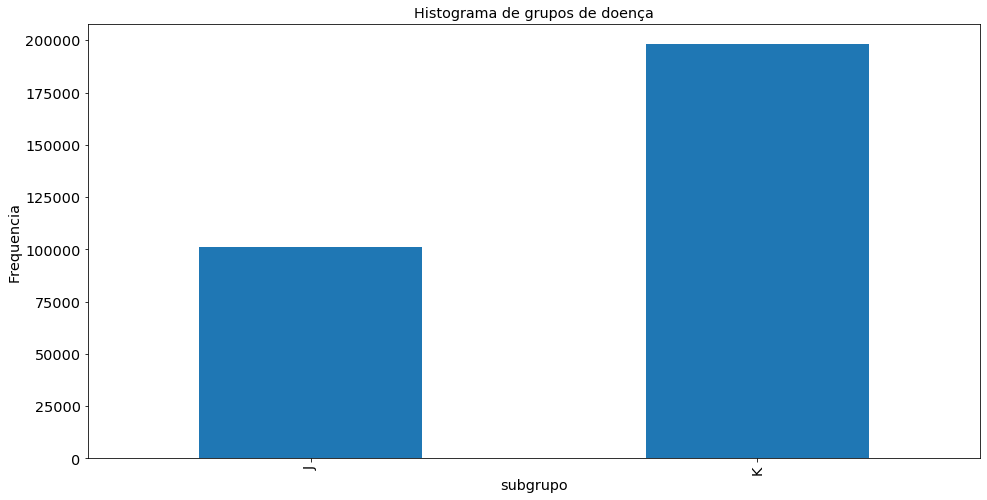

In [103]:
count_classes = pd.value_counts(mg['subgrupo'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de grupos de doença")
plt.xlabel("subgrupo")
plt.ylabel("Frequencia")

In [104]:
count_classes

J    101144
K    198109
Name: subgrupo, dtype: int64

In [105]:
101144+198109

299253

In [106]:
y = mg.loc[:,'subgrupo']

In [107]:
y.head(4)

0    J
1    J
2    J
5    J
Name: subgrupo, dtype: object

In [108]:
y.unique()

array(['J', 'K'], dtype=object)

In [109]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [110]:
y = le.fit_transform(y)

In [111]:
y = np.ravel(y)
y.shape

(299253,)

In [112]:
X = mg.drop(['subgrupo', "diag_princ"],axis=1)

In [113]:
X.dropna()

munic_res  Situacao_setor  V001
0          350020               1   246
1          350020               1   246
2          350020               1   246
5          350020               1   246
6          350020               1   246
...           ...             ...   ...
7954822    350950               1    50
7954842    350950               1    50
7954856    350950               1    50
7954877    350950               1    50
7954902    350950               1    50

[299253 rows x 3 columns]

In [114]:
X.isna().values.sum()

0

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=123,stratify=y)

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
sm = SMOTE(random_state=1234)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
# ravel para garantir que se ter apenas uma dimensão
# sm é a técnica de smote, para treino
# _res = resample, algo gerado virtualmente para aumentar os minoritários

Text(0, 0.5, 'Contagens')

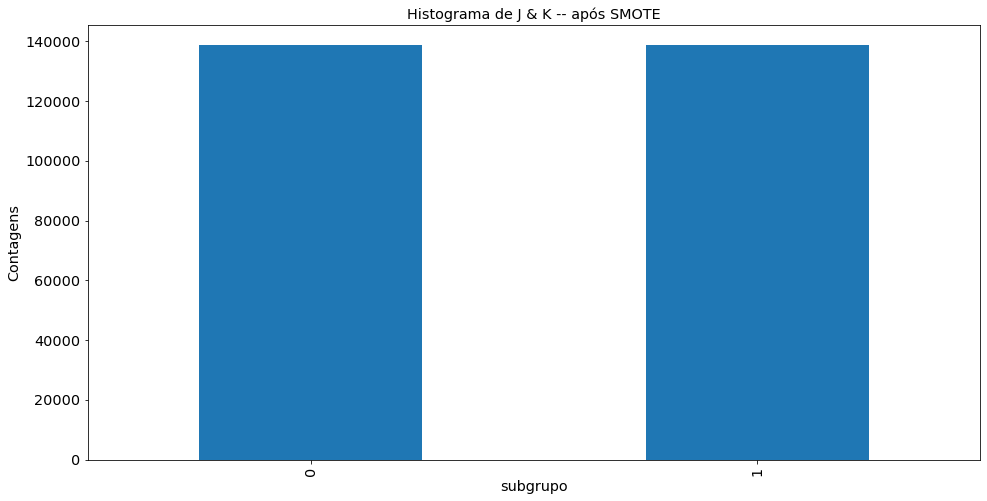

In [119]:
count_classes = pd.value_counts(y_train_res, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de J & K -- após SMOTE")
plt.xlabel("subgrupo")
plt.ylabel("Contagens")
# depois do smote, ficamos com 50%, houve assim balanceam

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [121]:
def CMatrix(CM,labels =['J','K']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [122]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(solver = 'sag', max_iter = 100000, class_weight={1:0.8,0:0.2})
log = logistic_regression.fit(X_train,y_train)

y_pred_test_log = logistic_regression.predict(X_test) 
acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)

CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
CMatrix(CM).T

Real          J      K  Total
Previsto                     
J             0      0      0
K         30343  59433  89776
Total     30343  59433  89776

## Regressão Logística pelo STATs

In [123]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf

In [125]:
formula = 'subgrupo ~ munic_res + Situacao_setor+V001'
model = smf.glm(formula, data=mg, family=sm.families.Binomial())
result = model.fit()

In [126]:
print(result.summary())

                       Generalized Linear Model Regression Results                        
Dep. Variable:     ['subgrupo[J]', 'subgrupo[K]']   No. Observations:               299253
Model:                                        GLM   Df Residuals:                   299195
Model Family:                            Binomial   Df Model:                           57
Link Function:                              logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:            -1.9012e+05
Date:                            Thu, 24 Sep 2020   Deviance:                   3.8025e+05
Time:                                    09:22:09   Pearson chi2:                 2.99e+05
No. Iterations:                                23                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--

## Conclusão = regressão logística requer revisão. Resultados NOk.